#### PROBLEM STATEMENT

As MyOnlineShop prepares for launch, one of the most important strategic capabilities we want to build early is customer understanding. Before we can personalize recommendations, design targeted promotions, or optimize retention strategies, we must first understand who our customers are and how they behave.

#### OBJECTIVES
- Develop an analytical mindset around customer behavior.
- Explore customer dataset to identify key behavioral signals
- Translate signals into clear customer segments that the business can act on.

#### Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # data viz library
import seaborn as sb # data viz library

In [2]:
retail_df = pd.read_excel('OnlineRetail.xlsx')

#### DATA PROFILING

In [3]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


- All columns except the customerID column have correct datatypes
- Both CustomerID and Description column have null values

retail_df["CustomerID"] = retail_df["CustomerID"].astype(str)

In [5]:
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

- The **Description** column has 1,454 null rows and the **CustomerID** column has 135,080 null rows

In [6]:
retail_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


- There are negative values in the quantity, which usually indicate returned goods or cancelled orders.
- Negative values in the pricing, however, are mostly input errors.
- There is a marked difference between the quantile of the **Quantity** column, especially between the 3rd and 4th quartile.

In [7]:
retail_df["Country"].nunique()

38

#### DATA CLEANING

#### This will involve the following steps;
- Handling negative values
- Handling null values
- Removing outliers
- Creating a Total spend column and customer-level data
- Creating purchase recency column

a) Handling negative values

In [8]:
retail_df = retail_df[
    (retail_df["Quantity"] > 0) &
    (retail_df["UnitPrice"] > 0)
]
retail_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


- There are no more negative values in our dataset

#### b) Handling null values

- The 1454 null values in the **description** column would be ignored as the number is insignificany compare to the data volume'.
- Null values in the **customerID** column will be dropped, because the ID is the most important attribute of customers and without that primary
information, customer segmentation and personas is null and void.

In [9]:
retail_df = retail_df.dropna(subset=["CustomerID"])
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


- Now, every column in the dataset have equal number of non-null rows at a total of 397,884. 

#### c) Handling outliers
- This will be done using the percentile rule, where the middle 99% is kept and the extreme 1% is removed

In [10]:
q_low = retail_df["Quantity"].quantile(0.01)
q_high = retail_df["Quantity"].quantile(0.99)

p_low = retail_df["UnitPrice"].quantile(0.01)
p_high = retail_df["UnitPrice"].quantile(0.99)


In [11]:
retail_df = retail_df[
    (retail_df["Quantity"] >= q_low) &
    (retail_df["Quantity"] <= q_high) &
    (retail_df["UnitPrice"] >= p_low) &
    (retail_df["UnitPrice"] <= p_high)
]
retail_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,387420.000000,387420,387420.000000,387420.000000
mean,9.758822,2011-07-10 18:51:05.229828096,2.745214,15303.196611
min,1.000000,2010-12-01 08:26:00,0.210000,12347.000000
25%,2.000000,2011-04-06 14:53:00,1.250000,13975.000000
50%,5.000000,2011-07-31 12:52:00,1.950000,15172.000000
75%,12.000000,2011-10-20 14:41:00,3.750000,16805.000000
max,120.000000,2011-12-09 12:50:00,14.950000,18287.000000
std,14.334699,NaN,2.540683,1709.745784


#### d 1) Creating "Total Spend" column

In [12]:
retail_df["TotalSpend"] = retail_df["Quantity"] * retail_df["UnitPrice"]

retail_df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#### d 2) Creating a customer-level dataset

In [13]:
customer_df = retail_df.groupby("CustomerID").agg({
    "InvoiceDate": "max",          # This would be the last purchase date of a customer
    "InvoiceNo": "nunique",        # number of purchases
    "TotalSpend": "sum",           # total money spent
    "Quantity": "sum",             # total quantity purchased
   
}).reset_index()

customer_df.columns = [
    "CustomerID",
    "LastPurchaseDate",
    "PurchaseCount",
    "TotalSpend",
    "TotalQuantity",
    
]
customer_df.head()

,CustomerID,LastPurchaseDate,PurchaseCount,TotalSpend,TotalQuantity
0,12347.0,2011-12-07 15:52:00,7,4060.40,2218
1,12348.0,2011-09-25 13:13:00,4,1186.68,1468
2,12349.0,2011-11-21 09:51:00,1,1353.80,625
3,12350.0,2011-02-02 16:01:00,1,294.40,196
4,12352.0,2011-11-03 14:37:00,7,1385.74,526


In [14]:
customer_df.shape

(4290, 5)

- There are 4,290 rows in the customer dataframe, meaning there are as much number of unique customers in the data set.

#### e) Creating a "RecencyDay" column

In [15]:
import pandas as pd

latest_date = retail_df["InvoiceDate"].max()

customer_df["RecencyDays"] = (
    latest_date - customer_df["LastPurchaseDate"]
).dt.days
customer_df.head()

,CustomerID,LastPurchaseDate,PurchaseCount,TotalSpend,TotalQuantity,RecencyDays
0,12347.0,2011-12-07 15:52:00,7,4060.40,2218,1
1,12348.0,2011-09-25 13:13:00,4,1186.68,1468,74
2,12349.0,2011-11-21 09:51:00,1,1353.80,625,18
3,12350.0,2011-02-02 16:01:00,1,294.40,196,309
4,12352.0,2011-11-03 14:37:00,7,1385.74,526,35


In [16]:
customer_df["Country"] = retail_df["Country"]
customer_df.head()

,CustomerID,LastPurchaseDate,PurchaseCount,TotalSpend,TotalQuantity,RecencyDays,Country
0,12347.0,2011-12-07 15:52:00,7,4060.40,2218,1,United Kingdom
1,12348.0,2011-09-25 13:13:00,4,1186.68,1468,74,United Kingdom
2,12349.0,2011-11-21 09:51:00,1,1353.80,625,18,United Kingdom
3,12350.0,2011-02-02 16:01:00,1,294.40,196,309,United Kingdom
4,12352.0,2011-11-03 14:37:00,7,1385.74,526,35,United Kingdom


#### EXPLORATORY DATA ANALYSIS: PART 1

In [17]:
def custom_bar_plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(8, 5))
    plt.bar(x, y)                        
    plt.title(f'{ylabel} by {xlabel}')  
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    sb.despine()
    plt.show()

def plot_pie(values, labels, colors):
    plt.pie(values, labels=labels, autopct='%.0f%%', colors=colors)
    plt.show()

#### 1) How many unique customers do we have?

In [18]:
customer_count = customer_df.agg({"CustomerID" : 'count'})
customer_count

CustomerID    4290
dtype: int64

- ANS: We have a total of 4,290 customers

   #### 2) How are our customers distributed internationally?


In [19]:
customer_df["Country"].nunique()

7

In [20]:
customer_df["Country"].unique()

array(['United Kingdom', 'France', nan, 'Australia', 'Netherlands',
       'Germany', 'Norway', 'EIRE'], dtype=object)

In [21]:
customer_df["Country"].isnull().sum()

np.int64(1286)

*ANSWER* 
- We have 1,286 customers of unknown nationality
- The 3004 remaining customers are distributed across seven countries, including: United Kingdom, France, Australia, Netherlands, Germany, Norway, and EIRE (Ireland)

#### 3) How long did our dataset span for and how much did we make within this time?

In [22]:
sales_duration = retail_df["InvoiceDate"].max() - retail_df["InvoiceDate"].min()
sales_duration 

Timedelta('373 days 04:24:00')

In [23]:
total_revenue = customer_df["TotalSpend"].agg("sum")
total_revenue

np.float64(6906884.05)

*ANSWER* 
- We realized **$6,906,884** in revenue in 373 days

#### 4) How was our revenue generation in each country?

In [24]:
revenue_by_country = customer_df.groupby("Country").agg({"TotalSpend" : "sum"}).reset_index()
revenue_by_country.columns = ["Country", "Revenue"]
revenue_by_country

,Country,Revenue
0,Australia,17496.63
1,EIRE,78109.65
2,France,24577.38
3,Germany,18739.30
4,Netherlands,117.15
5,Norway,221095.64
6,United Kingdom,4553090.85


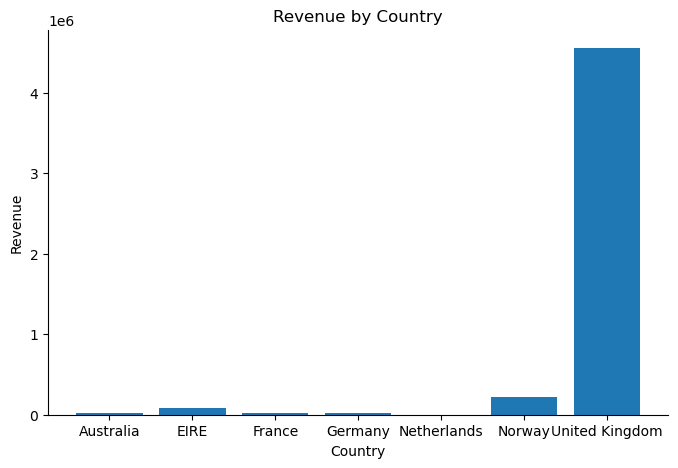

In [25]:
custom_bar_plot(revenue_by_country['Country'], revenue_by_country['Revenue'], 'Country', 'Revenue')

In [26]:
known_source = revenue_by_country["Revenue"].agg("sum")
known_source

np.float64(4913226.6)

In [27]:
unknown_source = total_revenue - known_source
unknown_source

np.float64(1993657.4500000002)

*ANSWER* 
- From the total revenue, **$$4,913,226.6**  was generated from the seven known countries, while **$1,993,657.45** was generated from customers whose nationality we do not know.
- The United Kingdom contributed the largest portion to revenue, and the Netherlands contributed the least

#### 4) How many items did we sell in the said time?

In [28]:
total_quantity = customer_df["TotalQuantity"].agg("sum")
total_quantity

np.int64(3780763)

*ANSWER* 
- A total of 3,780,763 items were sold

#### 5) How many items were sold per country

In [29]:
known_country_units = customer_df.groupby("Country").agg({"TotalQuantity" :"sum"}).reset_index()
known_country_units

,Country,TotalQuantity
0,Australia,10799
1,EIRE,61307
2,France,15467
3,Germany,9512
4,Netherlands,23
5,Norway,97861
6,United Kingdom,2497023


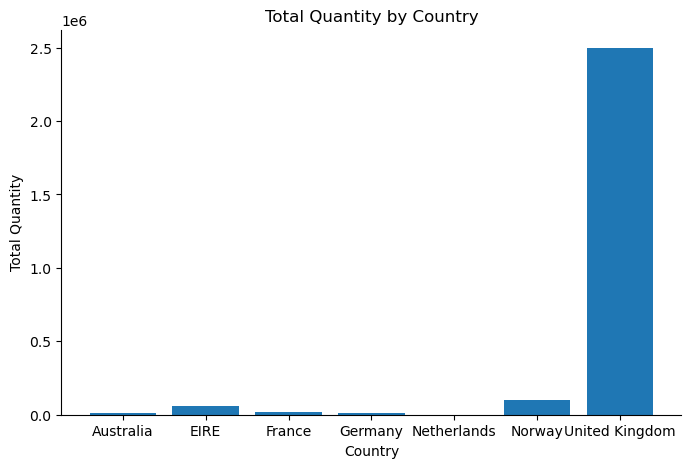

In [30]:
custom_bar_plot(known_country_units['Country'], known_country_units['TotalQuantity'], 'Country', 'Total Quantity')

*ANSWER*
- Like was the case with revenue generated, customers in the United Kingdom purchased more than the other countries with customers in Netherlands purchasing the least

In [31]:
X = retail_df["Description"].nunique()
X

3800

#### K-MEANS CLUSTERING

This involves;
- Defining the features/column of interest
- Scaling the features to make them similar and/or comparable
- Picking the numbers of "K"

#### a) Defining Features

The columns of interest from the customer_df are;
- RecencyDays
- PurchaseCount
- TotalSpend

These features were selected because they:

- Directly describe customer purchasing behaviour
- Are numeric and suitable for distance-based clustering
- Capture different dimensions of value and engagement
- Are widely used and well-established in customer segmentation (RFM framework)

In [32]:
# let X be the variable name that stores the features as a dataframe

X = customer_df[["RecencyDays", "PurchaseCount", "TotalSpend"]]


In [33]:
# Check no missing values in the features you’ll cluster on
customer_df.isnull().sum()


CustomerID             0
LastPurchaseDate       0
PurchaseCount          0
TotalSpend             0
TotalQuantity          0
RecencyDays            0
Country             1286
dtype: int64

#### b) Scaling Features

In [34]:
# Importing the scaling module and storing it in a variable
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [35]:
# Now scaling the stored features and restoring them in another variable called "x-scaled"

X_scaled = scaler.fit_transform(X)


#### DEPLOYING K-MEANS

#### a) Trying a range of K

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
silhouettes = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = kmeans.fit_predict(X_scaled)
    
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

list(zip(K_range, inertias, silhouettes))


[(2, 9197.06196664559, 0.5412594352610722),
 (3, 5316.769189312648, 0.5720724129747904),
 (4, 4545.31716063611, 0.5765311465697793),
 (5, 3194.514700410754, 0.5995799886391315),
 (6, 2696.593207130469, 0.5051973106677603),
 (7, 2258.8537506535204, 0.4842089407365985),
 (8, 2010.0583804572034, 0.5052878931118752),
 (9, 1732.4741048074357, 0.4650334996760577),
 (10, 1536.96152814426, 0.47147813010179385)]

#### b) Ploting the Elbow Plot and Silhouette

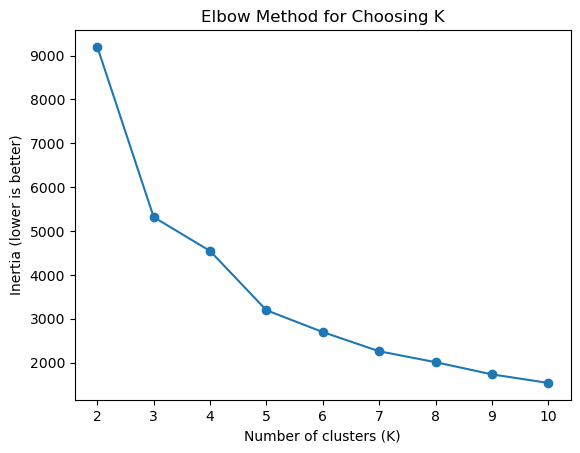

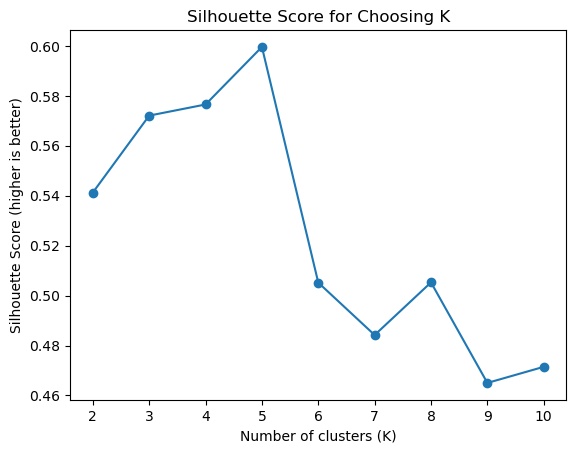

In [37]:
import matplotlib.pyplot as plt

# Elbow plot (Inertia)
plt.figure()
plt.plot(list(K_range), inertias, marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia (lower is better)")
plt.title("Elbow Method for Choosing K")
plt.show()

# Silhouette plot
plt.figure()
plt.plot(list(K_range), silhouettes, marker="o")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score (higher is better)")
plt.title("Silhouette Score for Choosing K")
plt.show()


#### c) Selecting K

In [38]:
best_k = 5


- K was selected by comparing inertia (using the elbow method) and silhouette scores across multiple values of K. We chose K = 5 because the reduction in inertia started to level off beyond 4, the silhouette scores were highest at 5, and this indicated a strong distinction between the clusters to be generated. 

#### d) Running K-Means

In [39]:
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init="auto")
customer_df["segment"] = kmeans_final.fit_predict(X_scaled)

customer_df["segment"].value_counts()


segment
1    2941
0    1061
4     271
3      15
2       2
Name: count, dtype: int64

- The result shows that an entire cluster was created for just two customers. This implies the cluster was created as an outlier segment. For the sake of creating a solid customer persona that aligns with the proper business strategy, a 2-member group would not suffice.
- However, to confirm the cluster is an outlier, the following checks will be run.

In [40]:
features = ["RecencyDays", "PurchaseCount", "TotalSpend"]

customer_df.groupby("segment")[features].agg(["count","mean","median"]).round(2)

#This is to check if the said cluster (2) has unusually high feature values


RecencyDays                PurchaseCount                TotalSpend  \
              count    mean median         count    mean median      count   
segment                                                                      
0              1061  246.91  242.0          1061    1.55    1.0       1061   
1              2941   43.26   32.0          2941    3.43    3.0       2941   
2                 2    0.00    0.0             2  200.50  200.5          2   
3                15    4.33    2.0            15   52.87   48.0         15   
4               271   13.78    7.0           271   18.61   16.0        271   

                             
             mean    median  
segment                      
0          438.96    297.00  
1         1142.79    749.10  
2        76903.81  76903.81  
3        57777.57  49368.61  
4         7600.45   5929.68

- The result above show that segment 2 has very high PurchaseCount and TotalSpend mean compared to other clusters.

In [41]:
best_k = 4
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init="auto")
customer_df["segment"] = kmeans_final.fit_predict(X_scaled)

customer_df["segment"].value_counts()

# Choosing K=4 to see the resulting clusters

segment
1    3169
0    1092
3      27
2       2
Name: count, dtype: int64

- Here there is still a two-member cluster, which has been established to be unfit for customer segmentation.

In [42]:
best_k = 3
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init="auto")
customer_df["segment"] = kmeans_final.fit_predict(X_scaled)

customer_df["segment"].value_counts()
# Choosing K=3 to see the resulting clusters

segment
1    3175
0    1094
2      21
Name: count, dtype: int64

In [43]:
customer_df.head()

,CustomerID,LastPurchaseDate,PurchaseCount,TotalSpend,TotalQuantity,RecencyDays,Country,segment
0,12347.0,2011-12-07 15:52:00,7,4060.40,2218,1,United Kingdom,1
1,12348.0,2011-09-25 13:13:00,4,1186.68,1468,74,United Kingdom,1
2,12349.0,2011-11-21 09:51:00,1,1353.80,625,18,United Kingdom,1
3,12350.0,2011-02-02 16:01:00,1,294.40,196,309,United Kingdom,0
4,12352.0,2011-11-03 14:37:00,7,1385.74,526,35,United Kingdom,1


- Result for K=3 gives a more relatable customer segmentation, good for creating personas on which service personalization can be based. Hence, k = 3 is employed as the "best-k"

#### KEYNOTE:

**Several values of K were evaluated. While higher values of K produced additional clusters, some of these clusters contained very few customers, indicating over-segmentation. A three-cluster solution provided balanced, distinct, and interpretable customer groups, making it the most suitable choice for downstream analysis and personalization**


#### PROFILING SEGMENTS

In [44]:
features = ["RecencyDays", "PurchaseCount", "TotalSpend"]

segment_profile = (
    customer_df
    .groupby("segment")[features]
    .agg(["count", "mean", "median"])
    .round(2)
)

segment_profile


RecencyDays                PurchaseCount               TotalSpend  \
              count    mean median         count   mean median      count   
segment                                                                     
0              1094  243.88  239.0          1094   1.58    1.0       1094   
1              3175   39.70   29.0          3175   4.65    3.0       3175   
2                21    5.81    2.0            21  70.00   51.0         21   

                             
             mean    median  
segment                      
0          443.24    296.94  
1         1679.25    861.44  
2        51922.07  46752.40

#### BUILDING PERSONAS
  

#### SEGMENT 0 : "GONE-COLD" CUSTOMERS

#### Characteristics Based on Data:
- A total 1094 unique customers
- Recency (mean ≈ 244 days) → they haven’t bought in a long time
- PurchaseCount (median = 1) → mostly one-time buyers
- TotalSpend (median ≈ 297) → low overall value

**Insight:** These customers bought once or twice, spent little, and have been inactive for a long period.

#### Persona Description:

Customers in this segment have made few purchases, spent relatively little, and have not engaged with the business for a long time. They are likely inactive or at risk of churn and may require reactivation efforts or targeted incentives.

#### SEGMENT 1 : "STEADY DOES IT!"

#### Characteristics Based on Data:
- A total of 3175 unique customers
- Recency (mean ≈ 40 days) → fairly recent activity
- PurchaseCount (median = 3) → repeat buyers
- TotalSpend (median ≈ 861) → moderate spend


**Insight:** These customers buy somewhat regularly, spend a reasonable amount, and remain active.

#### Persona Description:

This segment represents the core customer base, characterized by moderate purchase frequency, consistent spending, and relatively recent activity. These customers respond well to retention strategies and incremental upselling.


#### SEGMENT 2: "I LIKE IT, I BUY IT" / HIGH-VALUE LOYALIST

#### Characteristics Based on Data:
- A total of 21 unique customers make up this group
- Recency (mean ≈ 6 days) → extremely recent activity
- PurchaseCount (median = 51) → very frequent buyers
- TotalSpend (median ≈ 46,752) → extremely high value

#### Persona Description:
Customers in this segment exhibit extremely frequent purchases, very high spending, and recent engagement. Although small in number, they contribute disproportionately to revenue and should be prioritized for personalized experiences and loyalty rewards.

#### VISUAL COMPARISON OF THE CUSTOMER PERSONAS

#### a) Creating a custom function to easily plot graphs when needed

In [45]:
def custom_bar_plot(x, y, xlabel, ylabel):
    plt.bar(x, y)                        
    plt.title(f'{ylabel} by Customer Persona')  
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    sb.despine()
    
    imagename = input('Enter image name: ')
    plt.savefig(f'{imagename}.png', transparent=True)
    plt.show()


#### b) Creating a simple table to be used for plotting the graphs

In [46]:
segment_means = (
    customer_df
    .groupby("segment")[["RecencyDays", "PurchaseCount", "TotalSpend"]]
    .mean()
    .reset_index()
)
segment_means


,segment,RecencyDays,PurchaseCount,TotalSpend
0,0,243.879342,1.579525,443.241426
1,1,39.703622,4.653228,1679.248658
2,2,5.809524,70.000000,51922.068571


#### c) Adding a "segment_label" column to include the customer personas

In [47]:
segment_labels = {
    0: "Gone-Cold",
    1: "Steady-Does-It",
    2: "I Like It, I Buy It"
}

segment_means["segment_label"] = segment_means["segment"].map(segment_labels)
segment_means


,segment,RecencyDays,PurchaseCount,TotalSpend,segment_label
0,0,243.879342,1.579525,443.241426,Gone-Cold
1,1,39.703622,4.653228,1679.248658,Steady-Does-It
2,2,5.809524,70.000000,51922.068571,"I Like It, I Buy It"


#### *Plotting to compare Recency Days*

Enter image name:  Recency Days


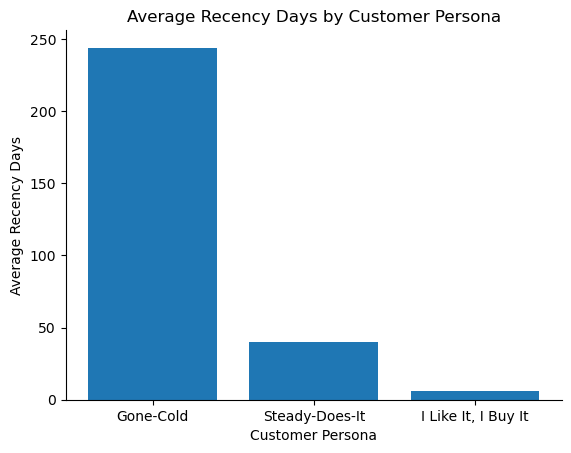

In [48]:
custom_bar_plot(
    segment_means["segment_label"],
    segment_means["RecencyDays"],
    'Customer Persona',
    'Average Recency Days'
)


#### *Plotting to compare Purcahse Counts*

Enter image name:  Purchase Count


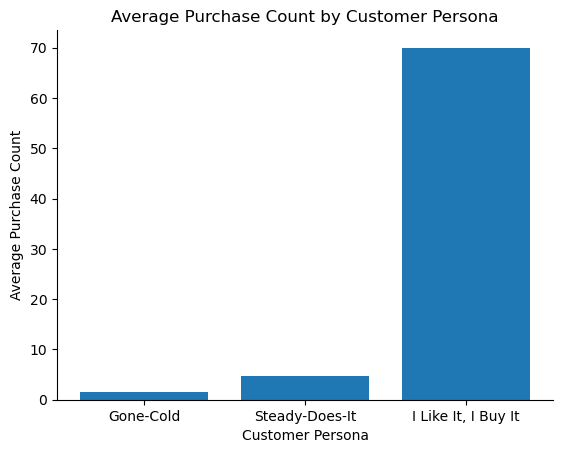

In [49]:
custom_bar_plot(
    segment_means["segment_label"],
    segment_means["PurchaseCount"],
    'Customer Persona',
    'Average Purchase Count'
)


#### *Plotting to compare Total Spend*

Enter image name:  Total Spend


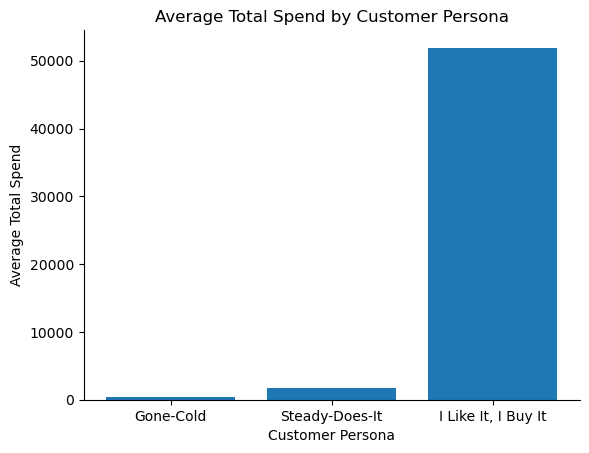

In [50]:
custom_bar_plot(
    segment_means["segment_label"],
    segment_means["TotalSpend"],
    'Customer Persona',
    'Average Total Spend'
)


#### EXPLORATORY DATA ANALYSIS : PART 2

#### 1) Where are our high-value customers from, how much did they buy, and how much did they spend?

In [51]:
customer_df["SegmentLabel"] = customer_df["segment"].map(segment_labels)
customer_df["Country"] = customer_df["Country"].fillna("Unknown")

customer_df.head()
# Adding the segment-label column to the customer-level table

,CustomerID,LastPurchaseDate,PurchaseCount,TotalSpend,TotalQuantity,RecencyDays,Country,segment,SegmentLabel
0,12347.0,2011-12-07 15:52:00,7,4060.40,2218,1,United Kingdom,1,Steady-Does-It
1,12348.0,2011-09-25 13:13:00,4,1186.68,1468,74,United Kingdom,1,Steady-Does-It
2,12349.0,2011-11-21 09:51:00,1,1353.80,625,18,United Kingdom,1,Steady-Does-It
3,12350.0,2011-02-02 16:01:00,1,294.40,196,309,United Kingdom,0,Gone-Cold
4,12352.0,2011-11-03 14:37:00,7,1385.74,526,35,United Kingdom,1,Steady-Does-It


In [52]:
high_value_country = (
    customer_df[customer_df["SegmentLabel"] == "I Like It, I Buy It"]
    .groupby("Country", as_index=False)
    .agg(
        TotalQuantity=("TotalQuantity", "sum"),
        TotalSpend=("TotalSpend", "sum"),
        Count=("Country", "size")
    )
)
high_value_country

,Country,TotalQuantity,TotalSpend,Count
0,EIRE,43466,46752.40,1
1,Norway,28667,97203.98,2
2,United Kingdom,287540,566293.88,12
3,Unknown,204565,380113.18,6


In [53]:
HV_totalSpend = high_value_country["TotalSpend"].agg("sum")
HV_totalSpend

np.float64(1090363.44)

In [54]:
HV_totalQuantity = high_value_country["TotalQuantity"].agg("sum")
HV_totalQuantity

np.int64(564238)

**Answer**
- While some are from unknown origins, our high-value customers are distributed across Ireland. Norway, United Kingdom.
- They spent **$$1,090,363** in total and bought 564,238 items.
- Although the bulk of the money was realized from the United Kingdom, on average, each customer spent over **$51,000**
- High-value customers' total spend made up 16% of our total revenue 

#### 2) Where are our regular customers from, how much did they buy, and how much did they spend?

In [55]:
regulars_country = (
    customer_df[customer_df["SegmentLabel"] == "Steady-Does-It"]
    .groupby("Country", as_index=False)
    .agg(
        TotalQuantity=("TotalQuantity", "sum"),
        TotalSpend=("TotalSpend", "sum"),
        Count=("Country", "size")
    )
)
regulars_country

,Country,TotalQuantity,TotalSpend,Count
0,Australia,10560,17049.52,13
1,EIRE,17316,30191.64,15
2,France,13737,22345.86,15
3,Germany,9113,18071.82,12
4,Norway,66028,119003.97,56
5,United Kingdom,2033820,3654511.85,2113
6,Unknown,811230,1470439.83,951


In [56]:
Reg_totalSpend = regulars_country["TotalSpend"].agg("sum")
Reg_totalSpend

np.float64(5331614.49)

In [57]:
Reg_totalQuantity = regulars_country["TotalQuantity"].agg("sum")
Reg_totalQuantity

np.int64(2961804)

**Answer**
- Our regular customers are spread across six out of seven nations in our dataset, with the exception being the Netherlands. There were also a considerable number with unknown nationalities.
- They spent **$$5,331,614** in total and bought **2,961,804** items.
- The bulk of the revenue was realized from the United Kingdom,
- On average, each customer spent over **$1,679**
- Regular customers' total spend made up 77% of our total revenue 

#### 2) Where are our "At- Risk" customers from, how much did they buy, and how much did they spend?

In [58]:
dormant_country = (
    customer_df[customer_df["SegmentLabel"] == "Gone-Cold"]
    .groupby("Country", as_index=False)
    .agg(
        TotalQuantity=("TotalQuantity", "sum"),
        TotalSpend=("TotalSpend", "sum"),
        Count=("Country", "size")
    )
)
dormant_country

,Country,TotalQuantity,TotalSpend,Count
0,Australia,239,447.11,1
1,EIRE,525,1165.61,4
2,France,1730,2231.52,4
3,Germany,399,667.48,2
4,Netherlands,23,117.15,1
5,Norway,3166,4887.69,15
6,United Kingdom,175663,332285.12,738
7,Unknown,72976,143104.44,329


In [59]:
dmt_totalSpend = dormant_country["TotalSpend"].agg("sum")
dmt_totalSpend

np.float64(484906.12)

In [60]:
dmt_totalQuantity = dormant_country["TotalQuantity"].agg("sum")
dmt_totalQuantity

np.int64(254721)

**Answer**
- Our regular customers span across all seven known countries in our dataset, including a considerable number with unknown nationalities.
- They spent **$$484,906** in total and bought **254,721** items.
- The bulk of the revenue, as usual, was realized from the United Kingdom,
- On average, each customer spent over **$445**
- Dormant customers' total spend made up 7% of our total revenue 

#### SUMMARY OF ANALYSIS

This analysis segmented customers based on purchasing behaviour to support personalization, marketing, and customer experience strategies for an e-commerce platform.

After profiling and cleaning the data, customer activity was summarized using three behavioural metrics: recency of purchase, purchase frequency, and total spend. These features were scaled and used in a K-means clustering model to identify naturally occurring customer groups. Multiple cluster options were evaluated, and a three-segment solution was selected as it produced clear, balanced, and actionable groups.

The segmentation revealed three distinct personas:

Gone-Cold – infrequent, low-value customers with long periods of inactivity and high churn risk.

Steady-Does-It – consistent, moderately valuable customers who form the core revenue base.

I Like It, I Buy It – a small but highly engaged and high-value group contributing disproportionately to revenue.

Visual summaries highlight clear behavioural differences across these personas. From a business perspective, the results support selective reactivation for Gone-Cold customers, retention and upselling for Steady-Does-It customers, and high-touch loyalty strategies for the most valuable customers. Overall, the segmentation provides a practical foundation for targeted personalization and efficient resource allocation.